In [1]:
# !pip install numpy pandas matplotlib seaborn wordcloud missingno scikit-learn keras tensorflow nltk torch transformers

In [2]:
import pandas as pd
import gzip
import nltk
import string
import random

import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    data = list(parse(path))
    df = pd.json_normalize(data, 'questions', ['asin'])
    return df

# Replace 'QA_Beauty.json.gz' with the actual path to your Gzip-compressed JSON file
df = getDF('QA_Beauty.json.gz')

# Display the DataFrame
df

,questionType,askerID,questionTime,questionText,answers,asin
0,open-ended,A3VTSR929E3J0R,"December 26, 2013",May I request for a manual instruction on this...,[{'answerText': 'Homedics has a complete list ...,B000050FES
1,open-ended,A1LZ5DJ7AJYAXD,"April 26, 2014",Having problems with the heater melting the wa...,[{'answerText': 'I leave the unit on all the t...,B000050FES
2,yes/no,A1ER8W5FAQM6G5,"July 11, 2014","How much wax (in pounds, for instance) does it...",[{'answerText': 'It came with the proper amoun...,B000050FES
3,open-ended,A1P403R4I7LVPU,"December 20, 2013",How to know the expired date of this product?,[{'answerText': 'The expiration date is on the...,B000052YQ2
4,open-ended,A166KM8A5H1Z2O,"February 26, 2014",I am not in the sun as I work inside. I am new...,[{'answerText': 'This product is awesome. I do...,B000052YQ2
...,...,...,...,...,...,...
32931,yes/no,A164SPHD6JR4L0,"July 2, 2014",is Argan Oil Pure 100% good for Skin?,[{'answerText': 'I really like it. It is a no...,B00L5JHZJO
32932,yes/no,A3LMNODD16O8J6,"July 2, 2014",I find myself with rough cuticles right around...,"[{'answerText': 'Yes, you can. In the evening ...",B00L5JHZJO
32933,yes/no,A13S7ZT69W96HR,"July 2, 2014",is it good for nail beauty?,[{'answerText': 'I would say it's good for cut...,B00L5JHZJO
32934,open-ended,A1HHOCBWVDXSE,"July 2, 2014",how can i use it for Topical Use on Dry Hair?,[{'answerText': 'A little goes a long way! A ...,B00L5JHZJO


In [3]:
import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)
        
def getDF(path):
    data = list(parse(path)) 
    df = pd.json_normalize(data, 'questions', ['asin'])
    return df

df = getDF('QA_Beauty.json.gz')

# Keep only relevant columns
df = df[['questionType', 'questionText', 'answers']]

# Add column with top answer text
df['top_answer'] = df['answers'].apply(lambda x: max(x, key=lambda y: float(y.get('answerScore', 0))).get('answerText', ''))

# Display columns of interest
print(df[['questionType', 'questionText', 'top_answer']])

      questionType                                       questionText  \
0       open-ended  May I request for a manual instruction on this...   
1       open-ended  Having problems with the heater melting the wa...   
2           yes/no  How much wax (in pounds, for instance) does it...   
3       open-ended      How to know the expired date of this product?   
4       open-ended  I am not in the sun as I work inside. I am new...   
...            ...                                                ...   
32931       yes/no              is Argan Oil Pure 100% good for Skin?   
32932       yes/no  I find myself with rough cuticles right around...   
32933       yes/no                        is it good for nail beauty?   
32934   open-ended      how can i use it for Topical Use on Dry Hair?   
32935   open-ended    how can i use it for Deep Conditioning Session?   

                                              top_answer  
0      Homedics has a complete list of instruction ma...  
1    

In [4]:
df.to_csv('questions_responses_all.csv', index=False)

In [5]:
df.head()

,questionType,questionText,answers,top_answer
0,open-ended,May I request for a manual instruction on this...,[{'answerText': 'Homedics has a complete list ...,Homedics has a complete list of instruction ma...
1,open-ended,Having problems with the heater melting the wa...,[{'answerText': 'I leave the unit on all the t...,I leave the unit on all the time so it is alwa...
2,yes/no,"How much wax (in pounds, for instance) does it...",[{'answerText': 'It came with the proper amoun...,"It came with the proper amount of wax, but thi..."
3,open-ended,How to know the expired date of this product?,[{'answerText': 'The expiration date is on the...,The expiration date is on the bottom of the pl...
4,open-ended,I am not in the sun as I work inside. I am new...,[{'answerText': 'This product is awesome. I do...,This product is awesome. I dont spend a lot of...


In [6]:
# Drop the "answers" column
df.drop(columns=['answers'], inplace=True)

# Rename "questionText" to "question" and "top_answer" to "response"
df.rename(columns={'questionText': 'Question', 'top_answer': 'Response'}, inplace=True)

# Display the modified DataFrame to verify changes
print(df.head())

  questionType                                           Question  \
0   open-ended  May I request for a manual instruction on this...   
1   open-ended  Having problems with the heater melting the wa...   
2       yes/no  How much wax (in pounds, for instance) does it...   
3   open-ended      How to know the expired date of this product?   
4   open-ended  I am not in the sun as I work inside. I am new...   

                                            Response  
0  Homedics has a complete list of instruction ma...  
1  I leave the unit on all the time so it is alwa...  
2  It came with the proper amount of wax, but thi...  
3  The expiration date is on the bottom of the pl...  
4  This product is awesome. I dont spend a lot of...  


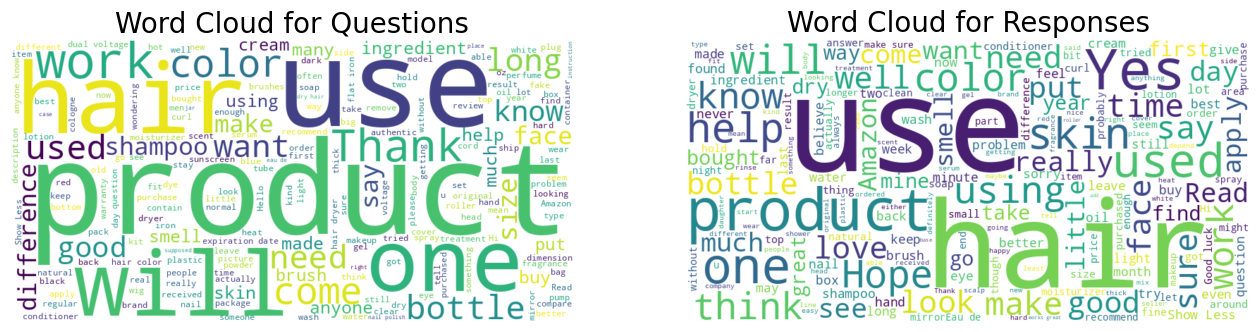

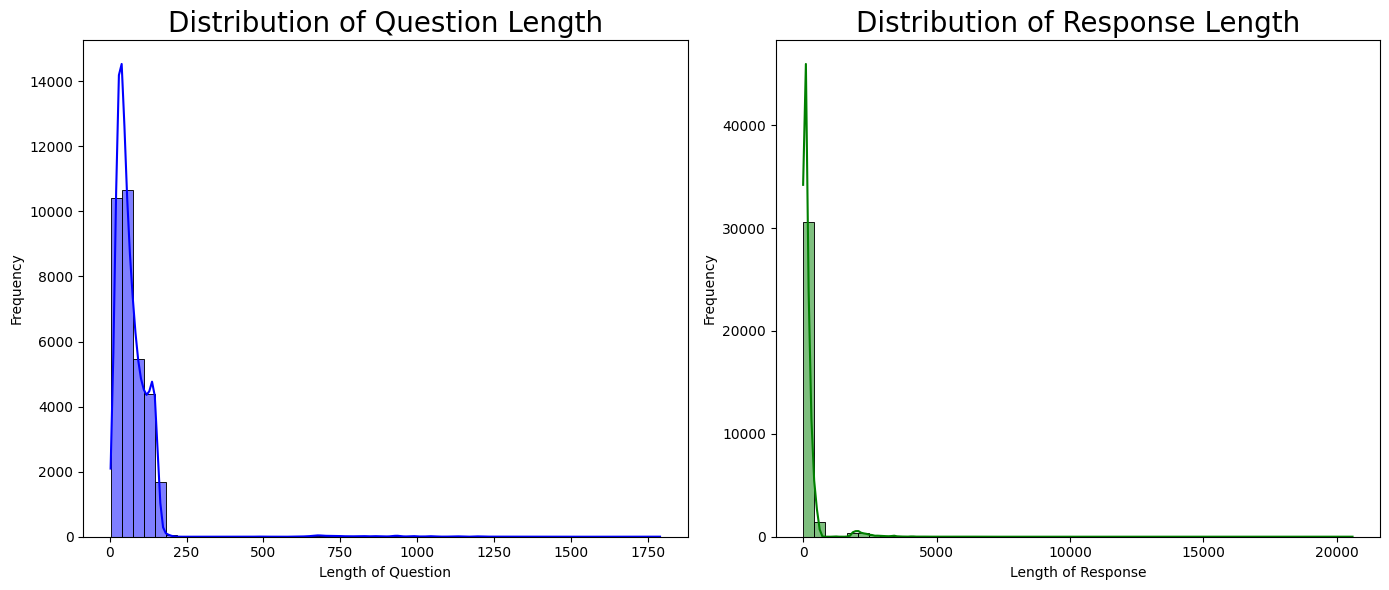

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Generating word clouds for Questions and Responses
question_text = " ".join(question for question in df.Question)
response_text = " ".join(response for response in df.Response)

wordcloud_questions = WordCloud(width=800, height=400, background_color ='white').generate(question_text)
wordcloud_responses = WordCloud(width=800, height=400, background_color ='white').generate(response_text)

# Plotting the word clouds
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_questions, interpolation='bilinear')
plt.title('Word Cloud for Questions', size=20)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_responses, interpolation='bilinear')
plt.title('Word Cloud for Responses', size=20)
plt.axis('off')

plt.show()

# Additionally, let's create a visual representation of the length of questions and responses
df['Question Length'] = df['Question'].apply(len)
df['Response Length'] = df['Response'].apply(len)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.histplot(df['Question Length'], bins=50, color='blue', kde=True)
plt.title('Distribution of Question Length', size=20)
plt.xlabel('Length of Question')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Response Length'], bins=50, color='green', kde=True)
plt.title('Distribution of Response Length', size=20)
plt.xlabel('Length of Response')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


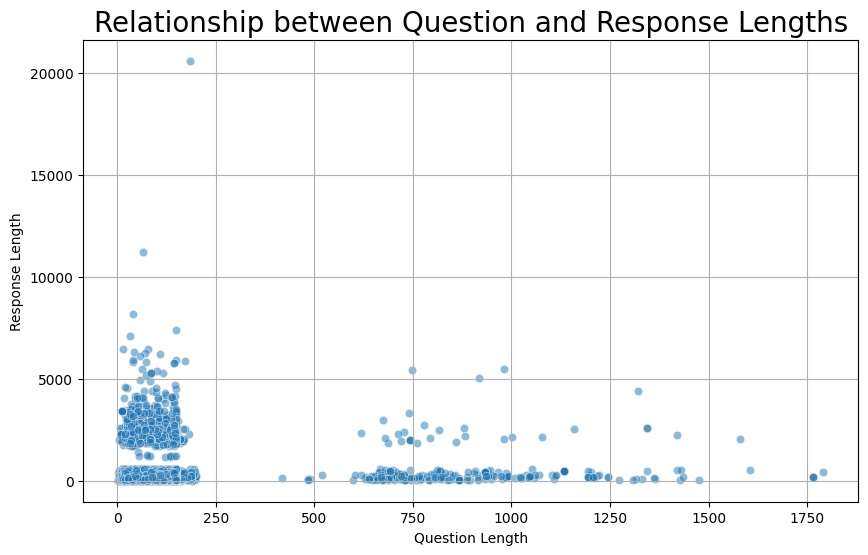

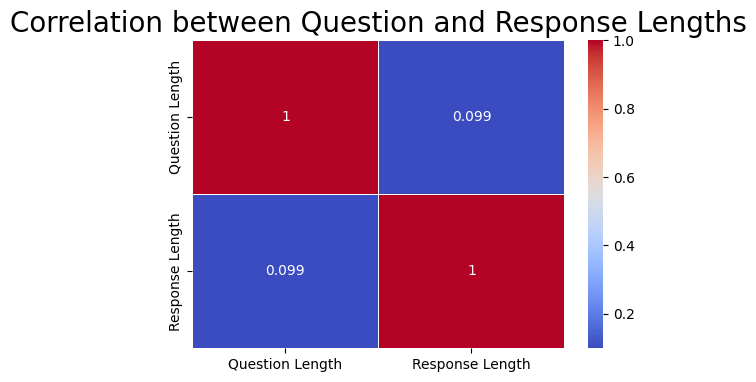

In [9]:
# Let's explore the relationship between the lengths of questions and responses
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Question Length', y='Response Length', alpha=0.5)
plt.title('Relationship between Question and Response Lengths', size=20)
plt.xlabel('Question Length')
plt.ylabel('Response Length')
plt.grid(True)

plt.show()

# Investigating the correlation between question length and response length
correlation_matrix = df[['Question Length', 'Response Length']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation between Question and Response Lengths', size=20)

plt.show()


/tmp/ipykernel_17231/1995875687.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_question_words, palette='viridis')


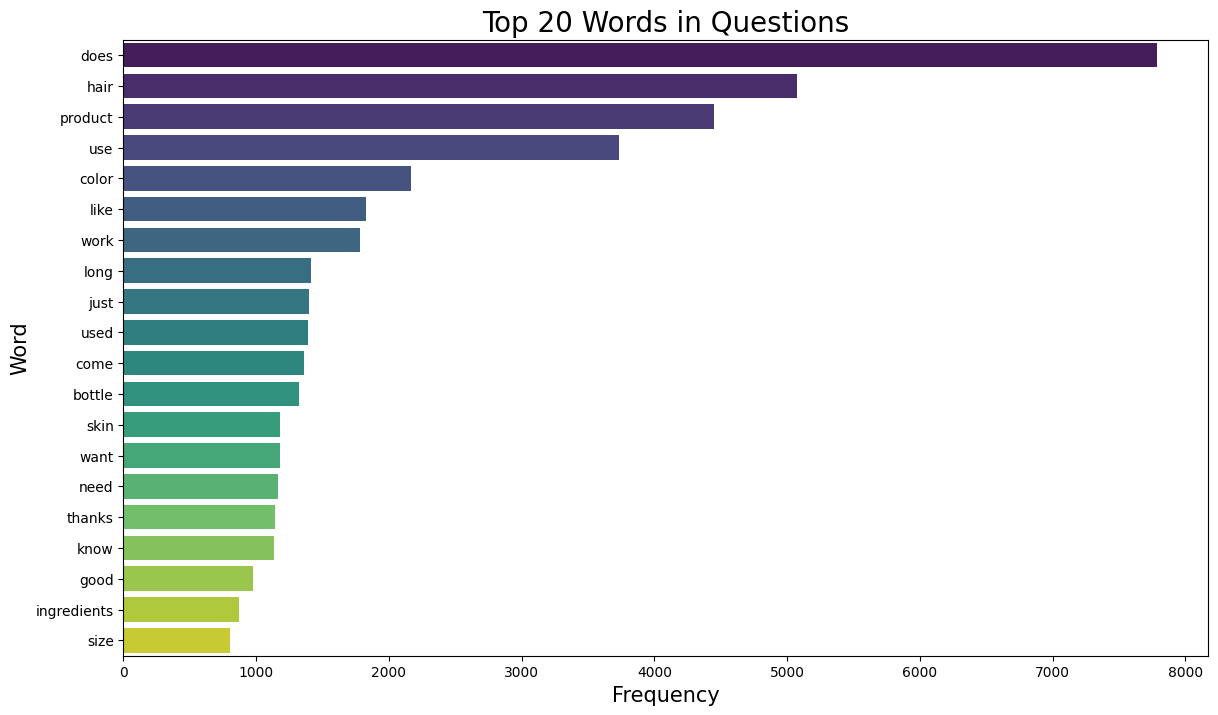

/tmp/ipykernel_17231/1995875687.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_response_words, palette='cividis')


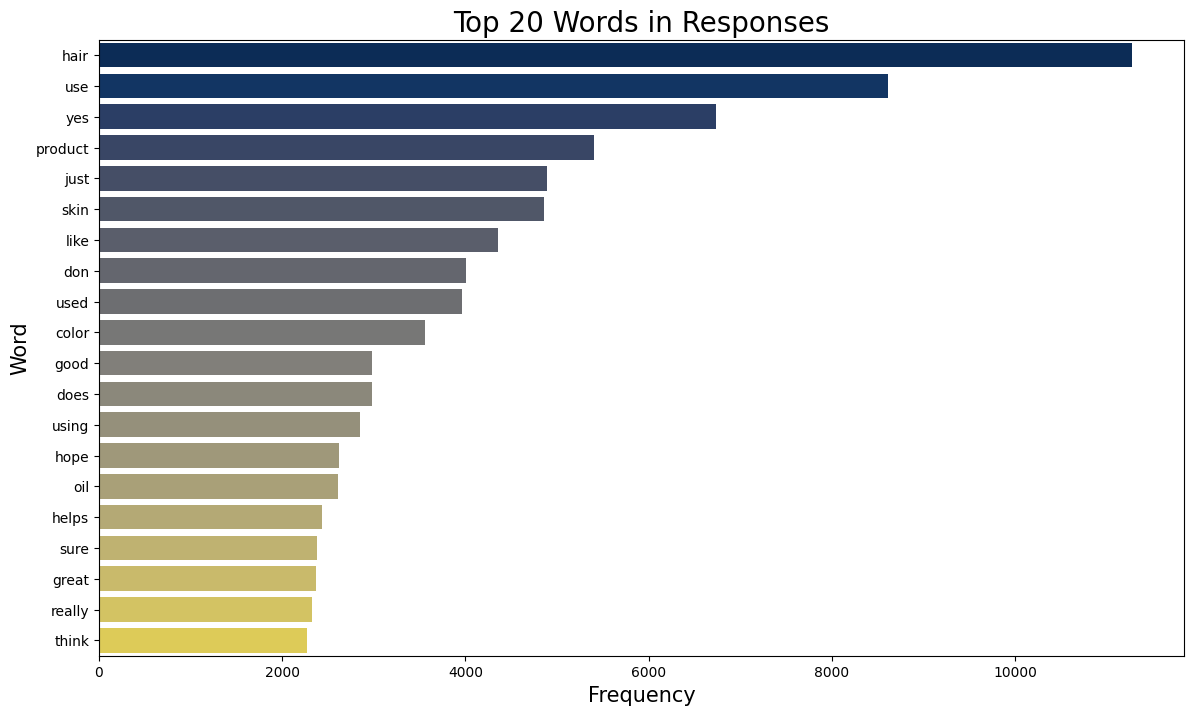

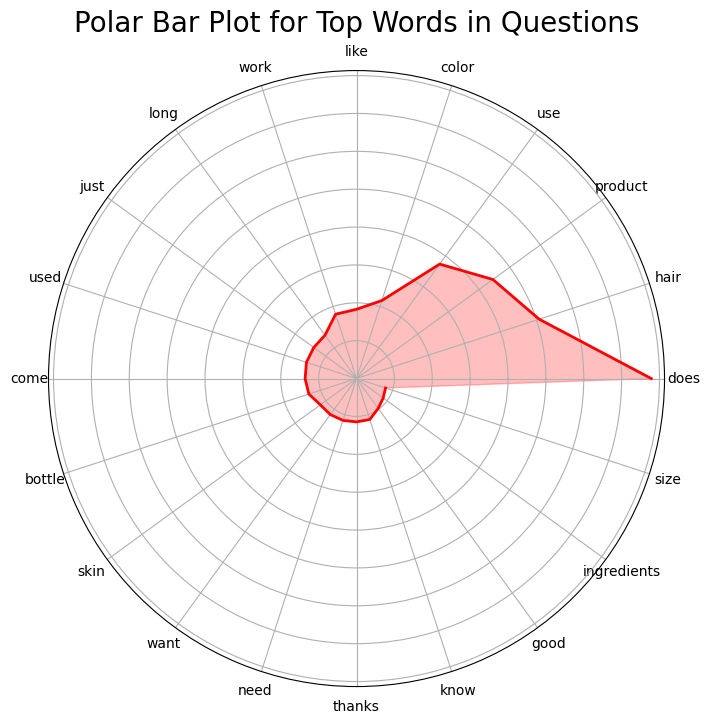

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Let's analyze the top words used in questions and responses excluding common stop words
cv_questions = CountVectorizer(stop_words='english', max_features=20)
cv_responses = CountVectorizer(stop_words='english', max_features=20)

question_matrix = cv_questions.fit_transform(df['Question'])
response_matrix = cv_responses.fit_transform(df['Response'])

question_words_sum = question_matrix.sum(axis=0)
response_words_sum = response_matrix.sum(axis=0)

question_words_freq = [(word, question_words_sum[0, idx]) for word, idx in cv_questions.vocabulary_.items()]
response_words_freq = [(word, response_words_sum[0, idx]) for word, idx in cv_responses.vocabulary_.items()]

question_words_freq = sorted(question_words_freq, key = lambda x: x[1], reverse=True)
response_words_freq = sorted(response_words_freq, key = lambda x: x[1], reverse=True)

# Convert to DataFrame for easy plotting
df_question_words = pd.DataFrame(question_words_freq, columns=['Word', 'Frequency'])
df_response_words = pd.DataFrame(response_words_freq, columns=['Word', 'Frequency'])

# Top words in Questions Bar Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Frequency', y='Word', data=df_question_words, palette='viridis')
plt.title('Top 20 Words in Questions', size=20)
plt.xlabel('Frequency', size=15)
plt.ylabel('Word', size=15)

plt.show()

# Top words in Responses Bar Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Frequency', y='Word', data=df_response_words, palette='cividis')
plt.title('Top 20 Words in Responses', size=20)
plt.xlabel('Frequency', size=15)
plt.ylabel('Word', size=15)

plt.show()

# Fancy Visualization: Polar Bar Plot for top words in questions
angles = np.linspace(0, 2 * np.pi, len(df_question_words), endpoint=False).tolist()
stats = df_question_words['Frequency'].tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='red', alpha=0.25)
ax.plot(angles, stats, color='red', linewidth=2)  # Draw the outline of our data
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(df_question_words['Word'])
plt.title('Polar Bar Plot for Top Words in Questions', size=20, y=1.05)

plt.show()


## Data Cleaning

In [11]:
from sklearn.model_selection import train_test_split

# Basic data cleaning steps

# Step 1: Lowercasing the text
df['Question_Clean'] = df['Question'].apply(lambda x: x.lower())
df['Response_Clean'] = df['Response'].apply(lambda x: x.lower())

# Step 2: Removing punctuation
import string
df['Question_Clean'] = df['Question_Clean'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['Response_Clean'] = df['Response_Clean'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Step 3: Removing numeric digits
df['Question_Clean'] = df['Question_Clean'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df['Response_Clean'] = df['Response_Clean'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

# Step 4: Tokenization and Removal of stop words might be considered at a later stage during model building
# For now, let's split the dataset into training and testing sets to prepare for model training.

X_train, X_test, y_train, y_test = train_test_split(df['Question_Clean'], df['Response_Clean'], test_size=0.2, random_state=42)

# Summary of cleaned data and split
train_test_split_summary = {
    'Training Set Size': len(X_train),
    'Test Set Size': len(X_test)
}

train_test_split_summary


{'Training Set Size': 26348, 'Test Set Size': 6588}

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Preparation for NLP Model Training
# Using TF-IDF Vectorization as a method to convert text data to numerical format

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)

# Fitting the vectorizer to the training data and transforming both training and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Summary of TF-IDF transformation
tfidf_transformation_summary = {
    'Training Set Shape': X_train_tfidf.shape,
    'Test Set Shape': X_test_tfidf.shape,
    'Type of TF-IDF Matrix': str(type(X_train_tfidf))
}

tfidf_transformation_summary


{'Training Set Shape': (26348, 10000),
 'Test Set Shape': (6588, 10000),
 'Type of TF-IDF Matrix': "<class 'scipy.sparse._csr.csr_matrix'>"}

## Modelling

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# This is a simplified outline and would need adjustments based on the specific dataset and requirements.

# Step 1: Tokenization
# Convert the text data into sequences of integers
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['Question_Clean'])
sequences = tokenizer.texts_to_sequences(df['Question_Clean'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Step 2: Padding sequences
data = pad_sequences(sequences, maxlen=100)

# Step 3: Building the LSTM model
model = Sequential()
model.add(Embedding(10000, 128, input_length=100))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model summary
model.summary()


Found 13847 unique tokens.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# pip show tensorflow


In [15]:
# pip install --upgrade tensorflow


In [16]:
# pip install --upgrade pip

## Model 2

In [21]:
# pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# Step 1: Load a pre-trained sentence embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Step 2: Compute embeddings for both the questions and responses in your dataset
question_embeddings = model.encode(df['Question_Clean'])
response_embeddings = model.encode(df['Response_Clean'])

# Function to find the most similar response to a given query
def find_most_similar_response(query, threshold=0.5):
    query_embedding = model.encode([query])
    similarities = cosine_similarity(query_embedding, question_embeddings)
    
    if similarities.max() < threshold:
        return "I'm sorry, but that seems to be outside our business operations or inventory."
    else:
        most_similar_index = similarities.argmax()
        return df['Response'].iloc[most_similar_index]

# Example query
query = "Do you have vegan options?"
response = find_most_similar_response(query)
print(response)


/home/gitpod/.pyenv/versions/3.9.0/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


After looking at the ingredients it looks like it is.


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.translate.bleu_score import sentence_bleu

# Example classification evaluation
# Assuming y_true and y_pred are the true labels and model predictions for relevance classification
y_true = [1, 0, 1, 1, 0]  # Example true labels
y_pred = [1, 0, 1, 0, 0]  # Example predictions

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

# Example generative evaluation
# Assuming responses and reference_responses are lists of generated and true responses respectively
responses = ["This is an example response."]
reference_responses = [["This is a sample of a correct response."]]  # Note: reference responses are in a list of lists for BLEU

# Calculating BLEU score for each response
bleu_scores = [sentence_bleu([ref], gen) for ref, gen in zip(reference_responses, responses)]

print("\nGenerative Task Evaluation:")
print(f"Average BLEU Score: {sum(bleu_scores) / len(bleu_scores):.2f}")


Classification Metrics:
Accuracy: 0.80, Precision: 1.00, Recall: 0.67, F1 Score: 0.80

Generative Task Evaluation:
Average BLEU Score: 0.00


## Fine-Tuning to improve the above scores

In [28]:
# pip install transformers torch


In [27]:
# pip install sentencepiece

In [29]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
from torch.utils.data import DataLoader, Dataset
import torch

class ChatDataset(Dataset):
    def __init__(self, tokenizer, questions, responses, max_length=512):
        self.tokenizer = tokenizer
        self.questions = questions
        self.responses = responses
        self.max_length = max_length

    def __len__(self):
        return len(self.questions)

    def __getitem__(self, idx):
        question = self.questions[idx]
        response = self.responses[idx]

        input_ids = self.tokenizer.encode(question, return_tensors='pt', max_length=self.max_length, truncation=True, padding='max_length')
        response_ids = self.tokenizer.encode(response, return_tensors='pt', max_length=self.max_length, truncation=True, padding='max_length')

        return input_ids, response_ids

# Assuming `questions` and `responses` are lists containing your data
tokenizer = T5Tokenizer.from_pretrained('t5-small')
dataset = ChatDataset(tokenizer, questions, responses)
loader = DataLoader(dataset, batch_size=8)

model = T5ForConditionalGeneration.from_pretrained('t5-small')

# Example training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)

for epoch in range(epochs):
    model.train()
    for input_ids, response_ids in loader:
        optimizer.zero_grad()
        input_ids = input_ids.to(device)
        response_ids = response_ids.to(device)

        outputs = model(input_ids=input_ids, labels=response_ids)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch}, Loss: {loss.item()}')



ImportError: 
T5Tokenizer requires the SentencePiece library but it was not found in your environment. Checkout the instructions on the
installation page of its repo: https://github.com/google/sentencepiece#installation and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.
